In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('cleaned_data.csv')




array([[<Axes: title={'center': 'disc_year'}>]], dtype=object)

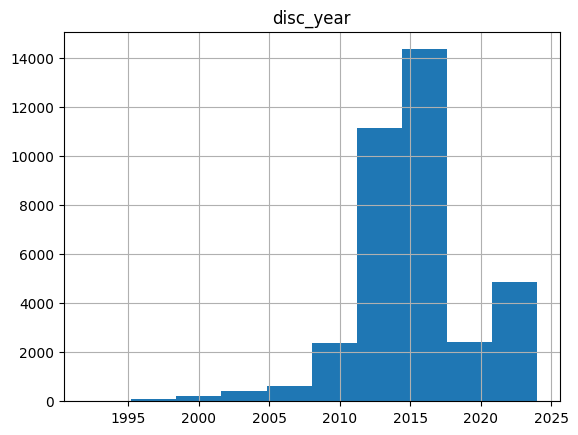

In [19]:
df.hist("disc_year")

In [20]:
df.head()

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23,2011-08,2014-07-23
1,2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14,2008-01,2014-05-14
2,3,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2023-09-19,2023-08,2023-09-19
3,4,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-09-04,2017-03,2018-09-06
4,5,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25,2011-08,2014-07-23


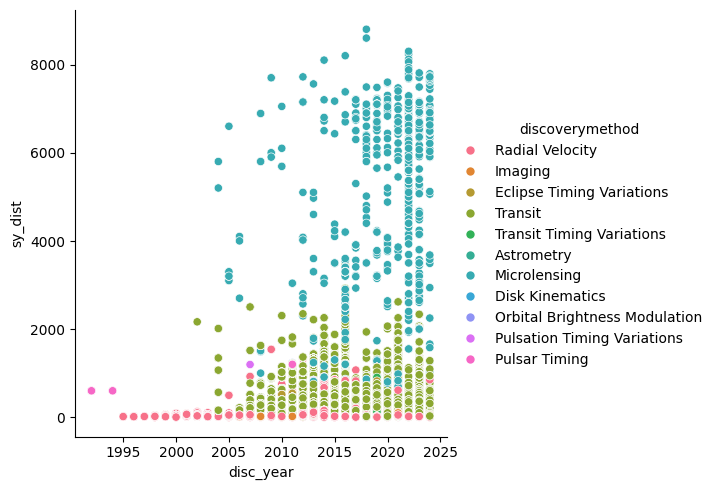

In [40]:
sns.relplot(data=df, x='disc_year', y='sy_dist', hue='discoverymethod');

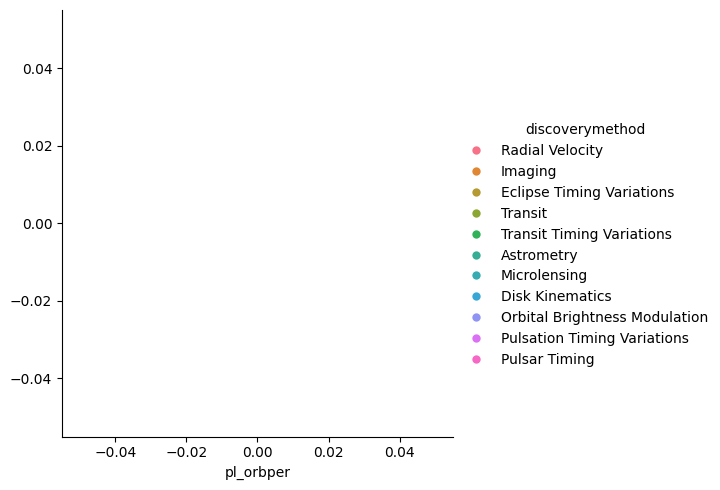

In [29]:
sns.relplot(data=df, x='pl_orbper', hue='discoverymethod');

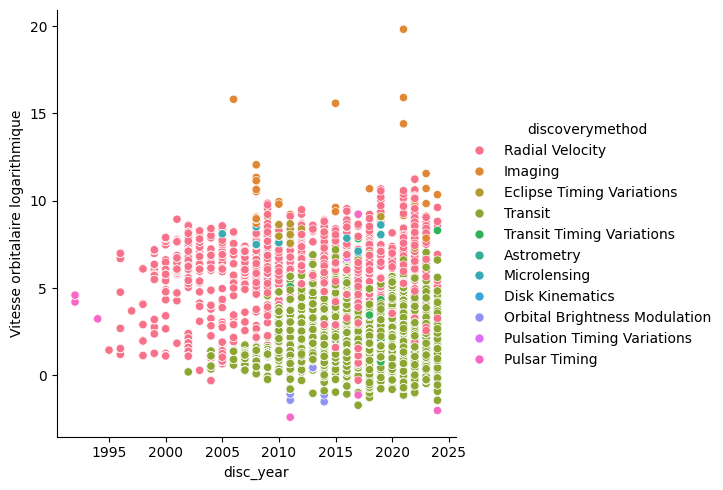

In [34]:
df['Vitesse orbitalaire logarithmique']=np.log(df['pl_orbper'])
sns.relplot(data=df, x='disc_year', y='Vitesse orbitalaire logarithmique', hue='discoverymethod');

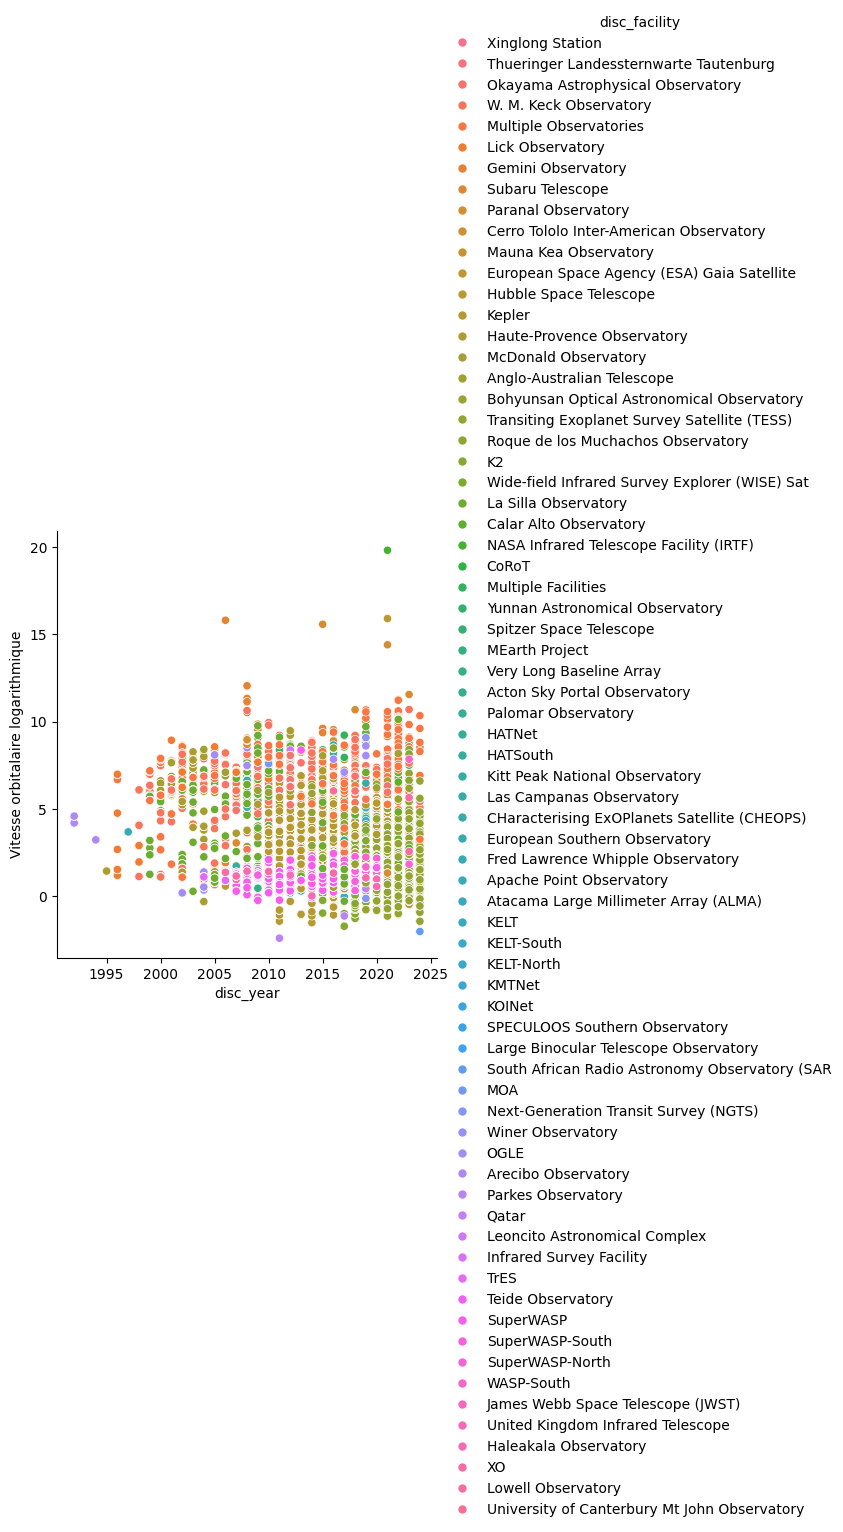

In [39]:
sns.relplot(data=df,x='disc_year', y='Vitesse orbitalaire logarithmique', hue='disc_facility');

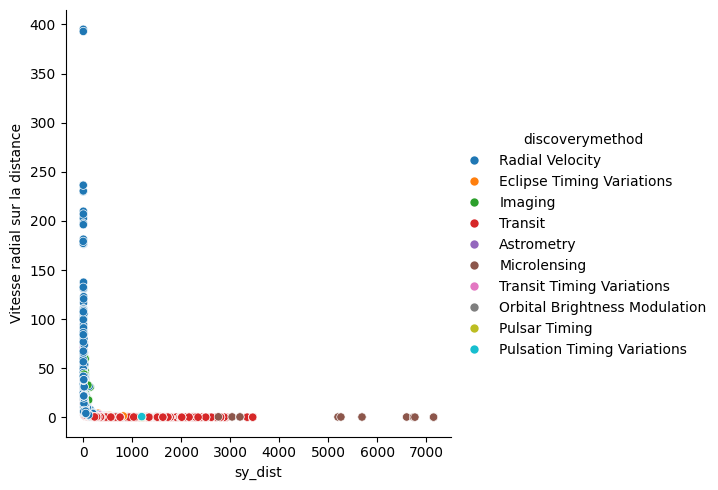

In [53]:
df['Vitesse radial sur la distance']= df['pl_orbper']/df['pl_orbsmax']/df['sy_dist']
sns.relplot(data=df[df['Vitesse radial sur la distance']<4000,x='sy_dist', y='Vitesse radial sur la distance', hue='discoverymethod');

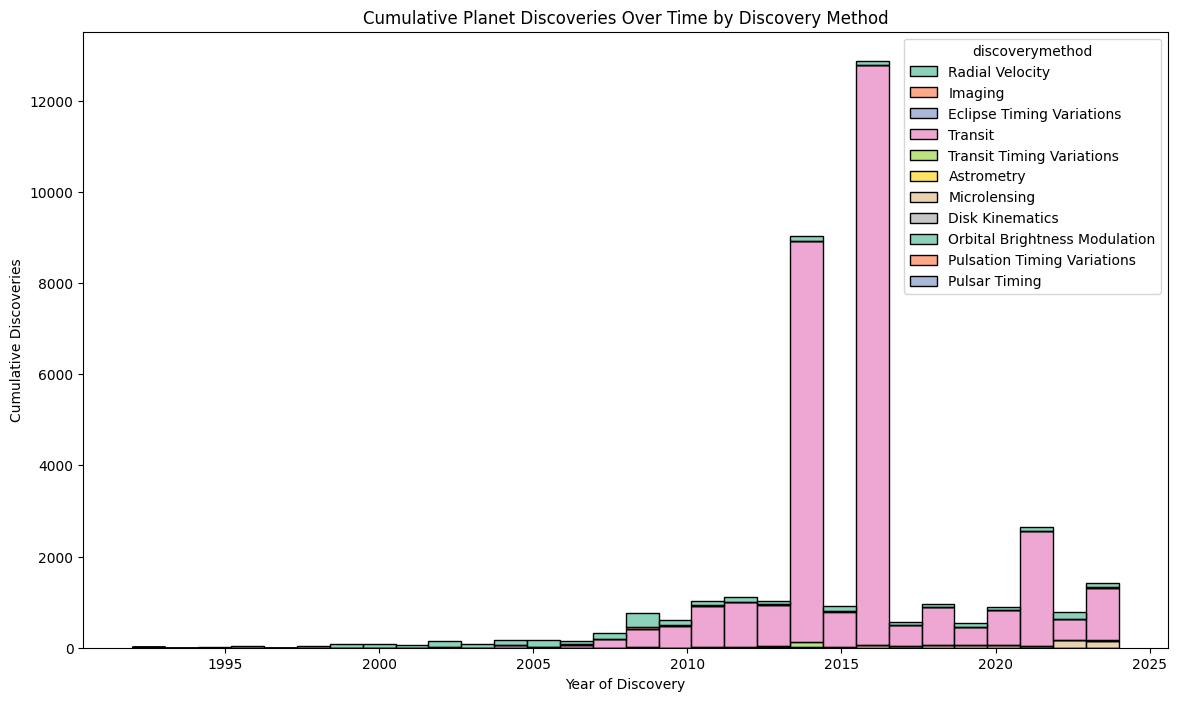

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('cleaned_data.csv')

# Prepare the data: Count cumulative discoveries per year and per discovery method
data['cumulative_count'] = data.groupby('discoverymethod').cumcount() + 1

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plot cumulative discoveries over time, differentiating by discovery method
sns.histplot(data, x="disc_year", hue="discoverymethod", multiple="stack", palette="Set2", kde=False, bins=30)

# Set labels and title
plt.xlabel("Year of Discovery")
plt.ylabel("Cumulative Discoveries")
plt.title("Cumulative Planet Discoveries Over Time by Discovery Method")

# Display the plot
plt.show()

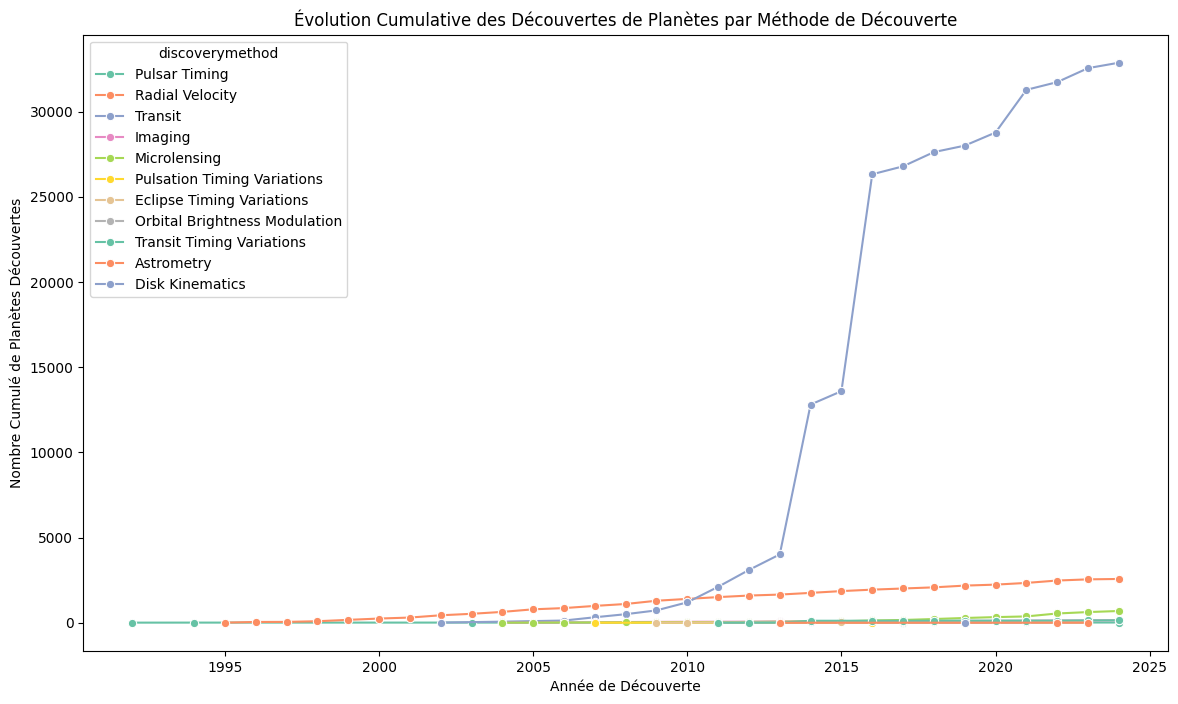

In [57]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données nettoyées
data = pd.read_csv('cleaned_data.csv')

# Calculer le cumul des découvertes par année et méthode
data_cumulative = data.groupby(['disc_year', 'discoverymethod']).size().groupby(level=1).cumsum().reset_index(name='cumulative_discoveries')

# Initialiser le graphique
plt.figure(figsize=(14, 8))

# Tracer le nombre cumulé de découvertes au fil des ans, par méthode de découverte
sns.lineplot(data=data_cumulative, x='disc_year', y='cumulative_discoveries', hue='discoverymethod', marker="o", palette="Set2")

# Ajouter les labels et un titre
plt.xlabel("Année de Découverte")
plt.ylabel("Nombre Cumulé de Planètes Découvertes")
plt.title("Évolution Cumulative des Découvertes de Planètes par Méthode de Découverte")

# Afficher le graphique
plt.show()

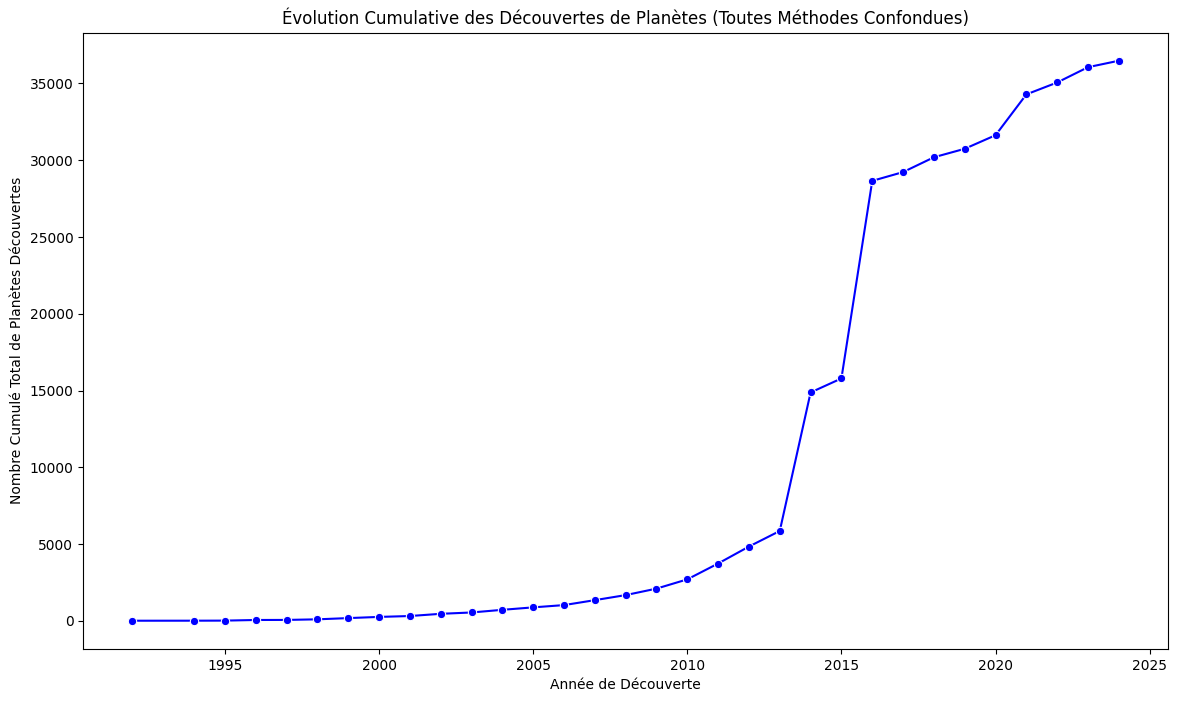

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données nettoyées
data = pd.read_csv('cleaned_data.csv')

data_counts = data.groupby('disc_year').size().reset_index(name='discoveries')

# Calculer le cumul des découvertes
data_counts['cumulative_discoveries'] = data_counts['discoveries'].cumsum()

# Initialiser le graphique
plt.figure(figsize=(14, 8))

# Tracer le nombre cumulé total de découvertes par année
sns.lineplot(data=data_counts, x='disc_year', y='cumulative_discoveries', marker="o", color="b")

# Ajouter les labels et un titre
plt.xlabel("Année de Découverte")
plt.ylabel("Nombre Cumulé Total de Planètes Découvertes")
plt.title("Évolution Cumulative des Découvertes de Planètes (Toutes Méthodes Confondues)")

# Afficher le graphique
plt.show()

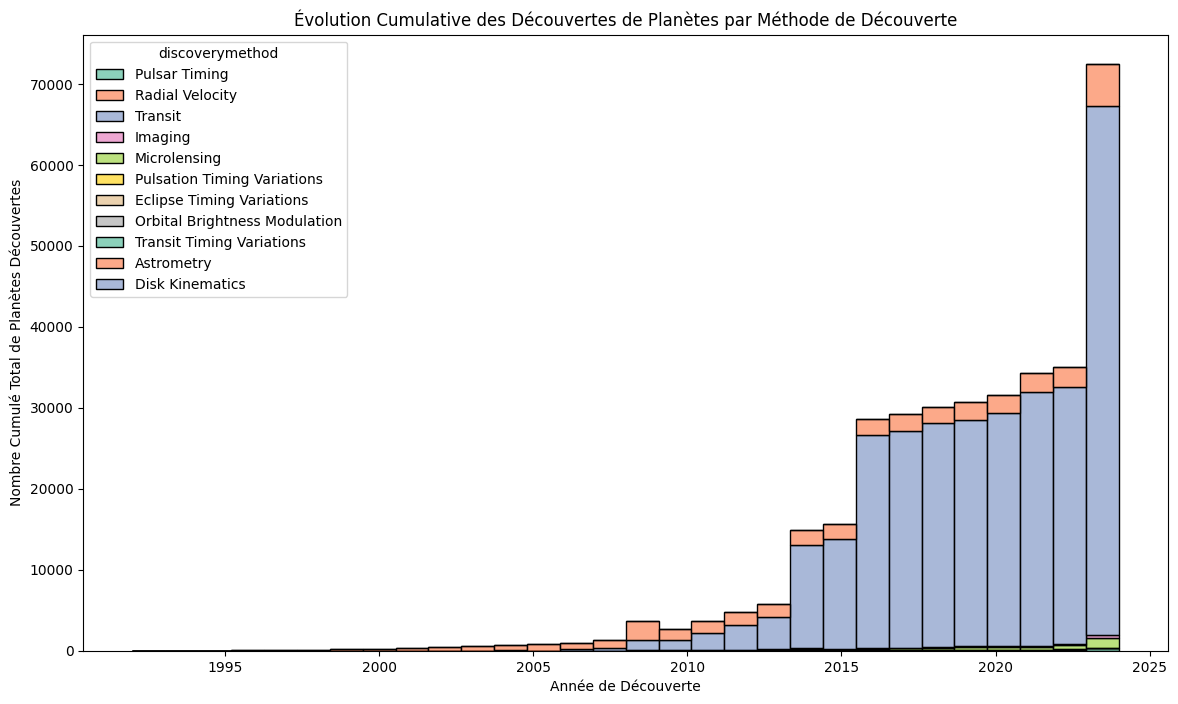

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données nettoyées
data = pd.read_csv('cleaned_data.csv')
# Compter les découvertes par année et méthode
data_counts = data.groupby(['disc_year', 'discoverymethod']).size().reset_index(name='discoveries')

# Calculer le cumul des découvertes pour chaque méthode au fil des années
data_counts['cumulative_discoveries'] = data_counts.groupby('discoverymethod')['discoveries'].cumsum()

# Initialiser le graphique
plt.figure(figsize=(14, 8))

# Tracer le nombre cumulé de découvertes, empilées par méthode
sns.histplot(data=data_counts, x="disc_year", weights="cumulative_discoveries", hue="discoverymethod",
             multiple="stack", palette="Set2", bins=30)

# Ajouter les labels et un titre
plt.xlabel("Année de Découverte")
plt.ylabel("Nombre Cumulé Total de Planètes Découvertes")
plt.title("Évolution Cumulative des Découvertes de Planètes par Méthode de Découverte")

# Afficher le graphique
plt.show()

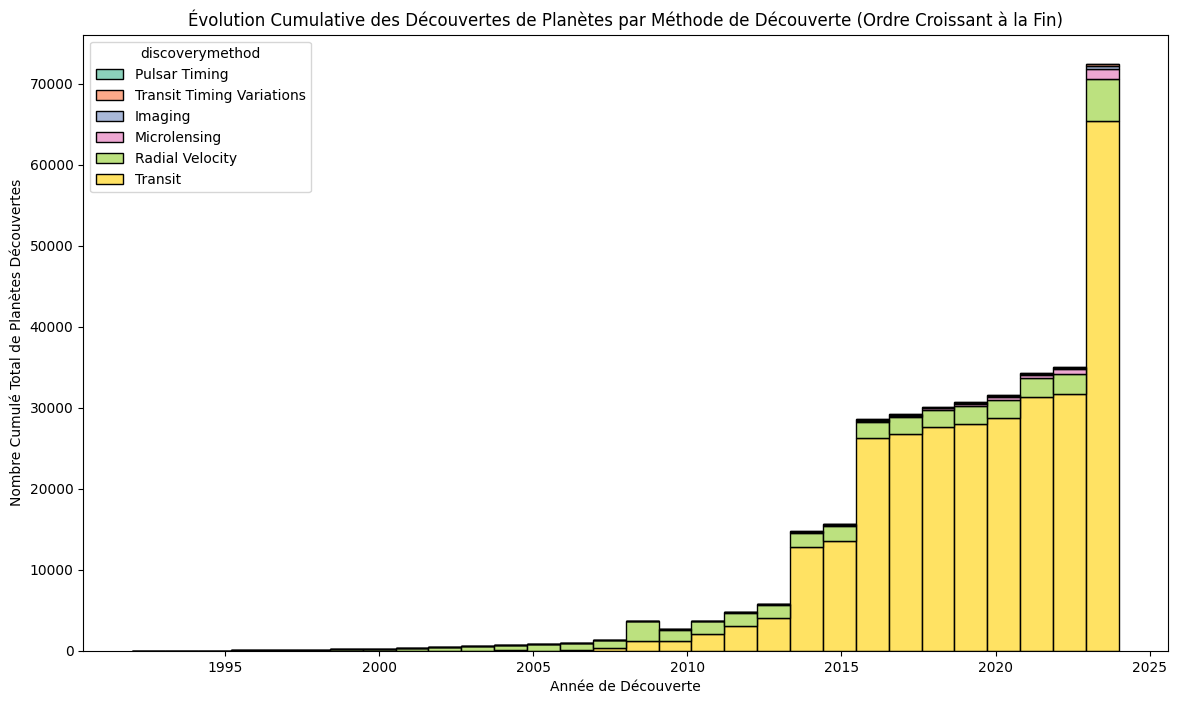

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données nettoyées
data = pd.read_csv('cleaned_data.csv')

# Compter les découvertes par année et méthode
data_counts = data.groupby(['disc_year', 'discoverymethod']).size().reset_index(name='discoveries')

# Calculer le cumul des découvertes pour chaque méthode
data_counts['cumulative_discoveries'] = data_counts.groupby('discoverymethod')['discoveries'].cumsum()

# Extraire la dernière année pour chaque méthode
last_year_counts = data_counts[data_counts['disc_year'] == data_counts['disc_year'].max()]

# Trier les méthodes par découvertes cumulées finales
sorted_methods = last_year_counts.sort_values('cumulative_discoveries')['discoverymethod'].tolist()

# Initialiser le graphique avec les couleurs dans l'ordre trié
plt.figure(figsize=(14, 8))
sns.histplot(data=data_counts, x="disc_year", weights="cumulative_discoveries", hue="discoverymethod",
             hue_order=sorted_methods, multiple="stack", palette="Set2", bins=30)

# Ajouter les labels et un titre
plt.xlabel("Année de Découverte")
plt.ylabel("Nombre Cumulé Total de Planètes Découvertes")
plt.title("Évolution Cumulative des Découvertes de Planètes par Méthode de Découverte (Ordre Croissant à la Fin)")

# Afficher le graphique
plt.show()
